# Lab 1 Report

Seth Richards and Anup Paudel

In [2]:
# import cell

import numpy as np
from scipy.io import wavfile as wav
import simpleaudio as sa
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

## Summary

In this lab, we both learn and demonstrate our knowledge of some basic python functions, operators, and expressions. We begin by working with simple array modifications and math, before doing audio modifications and math. After that, we take a look at the basics around how to graph functions. Then, we take our knowledge from all the previously developed skills, and apply them to make graphs of audio through modifying arrays with math.

# Assignment 1 -- Creating and Manipulating Arrays 

In [194]:
#A1

# Part A
y1 = [4,6,2]

# Part B
ca = y1[1]
cb = y1[1:3]
d = len(y1)
print("ca = ",ca)
print("cb = ",cb)
print("d = ",d)

# Part C
x1 = np.ones(5)*2
x2 = np.arange(-2,3,1)
print("x1 = ",x1)
print("x2 = ",x2)

# Part D
arrp = x1 + x2
arrc = np.concatenate([x1,x2])
print("arrp = ",arrp)
print("arrc = ",arrc)

ca =  6
cb =  [6, 2]
d =  3
x1 =  [2. 2. 2. 2. 2.]
x2 =  [-2 -1  0  1  2]
arrp =  [0. 1. 2. 3. 4.]
arrc =  [ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


### Discussion

Concatenation appears to combine both arrays, one after the other, maintaining their values in order but becoming one larger array.
Adding appears to be the opposite, actually adding each indexes value at the same point to make an array the same size as both while doing addition within.
When adding two arrays, the dimensions of both arrays need to match, while the concatenation does not require as such.

## Assignment 2 -- Amplitude Operations on Signals 

In [5]:
#A2

# Part A
fs = 2
t = np.arange(0,3.5,1/fs)
x = 0.5*t
y = t**2
print("x = ",x)
print("y = ",y)

# Part B
z = x - (2*y)
print("z = ",z)

# Part C
w1 = z[2*fs]
print("w1 = " , w1)

# Part D
w2 = z[0:2*fs]
print("w2 = ",w2)

x =  [0.   0.25 0.5  0.75 1.   1.25 1.5 ]
y =  [0.   0.25 1.   2.25 4.   6.25 9.  ]
z =  [  0.    -0.25  -1.5   -3.75  -7.   -11.25 -16.5 ]
w1 =  -7.0
w2 =  [ 0.   -0.25 -1.5  -3.75]


### Discussion

If the sampling rate fs = 1 instead of 2, their would be fewer numbers in the arrays becuase less samples would be taken (ie. sample every 1s instead of 0.5s). w1 would be unaffected, because it is only a single index with the sample end point so same value.

## Assignment 3 -- Working with Sound Files

In [9]:
#A3

# Part A
fs1,yy1 = wav.read('train32.wav')
fs2,yy2 = wav.read('tuba11.wav')
y1 = sa.WaveObject.from_wave_file('train32.wav')
y2 = sa.WaveObject.from_wave_file('tuba11.wav')

ch1 = y1.num_channels
ch2 = y2.num_channels

print("Channels of train32 = ",ch1)
print("Channels of tuba11 = ",ch2)

# Part B
#Commented out to save our ears

play_obj = y1.play()
play_obj.wait_done()
play_obj = y2.play()
play_obj.wait_done()
play_obj =sa.play_buffer(yy1, ch1, 2, fs2)
play_obj.wait_done()
play_obj =sa.play_buffer(yy2, ch1, 4, fs1)
play_obj.wait_done()






Channels of train32 =  1
Channels of tuba11 =  2


In [10]:
# Part C

len1 = yy1.shape[0]
len2 = yy2.shape[0]
yyy1 = [yy1,yy1]
y3 = yy2[0:50313]
#play_obj =sa .play_buffer(y3, 2, 2, fs2)
#play_obj.wait_done()

y4 = np.transpose(yyy1) + y3
wav.write('y4.wav',fs1,y4)

play_obj =sa .play_buffer(y4, 1, 2, fs1)
play_obj.wait_done()

In [16]:
# Part D

fs1,y1 = wav.read('train32.wav')
fs2,y2 = wav.read('tuba11.wav')

pause = np.zeros(int(4*fs1)) #4 second buffer
y5 = np.concatenate([y1, pause, y2[:,0]]) 
wav.write('y5.wav',fs1,y5.astype('int16'))
# play_obj =sa.play_buffer(y5, 2, 4, fs1)
# play_obj.wait_done()
fs3,y3 = wav.read("y5.wav")
play_obj =sa.play_buffer(y3, 1, 2, fs1)
play_obj.wait_done()

### Discussion

When the incorrect sampling rate is used, the audio file played either sounds lower pitched and slower or higher pitched and faster. This is because the sampling rate is in charge of how many "signals" are played per second, meaning if the sampling rate is lower than usual, then there will be fewer sounds "farther apart" and vice versa for higher.

## Assignment 4 -- Plotting Comparisons

In [2]:
#A4

# Part A

fs = 5
t = np.arange(-2,4,1/fs)
w = np.absolute(t)
x = 2 - t
y = -0.5 * (t**2)

fig1 = plt.figure(1)
fig2.subplots_adjust(hspace=1,wspace=0.4)

plt.plot(t,w,label='w(t)')
plt.plot(t,x,label='x(t)')
plt.plot(t,y,label='y(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.suptitle("t vs. w,x,y")
plt.legend()
plt.show()

# Part B

NameError: name 'np' is not defined

### Discussion

According to the documentation, in order to modify plots to be more easily read by people who are colorblind or if the graph is printed on black and white, a line style can simply be added as another section within the plot command.

ie.

plt.plot(t,w,label='w(t)')
to
plt.plot(t,w,label='w(t)',linestyle = ":")
which would print a dotted line.

Other styles of line include '-,' which is a dash dot line, '--' which is a true dotted line, or '-' which is the default solid line if the default needs to be specified.


## Assignment 5 -- Plotting Sound Files using Subplots

<IPython.core.display.Javascript object>


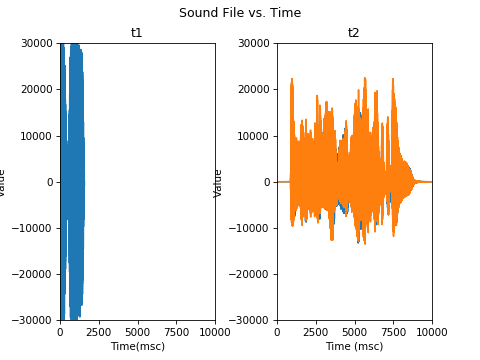

Text(0, 0.5, 'Value')

In [17]:
#A5

# Part A
fs1,y1 = wav.read('train32.wav')
fs2,y2 = wav.read('tuba11.wav')

t1 = y1[0:50313]
t2 = y2[0:109708]

timeArray1 = np.arange(0,len(t1),1)
timeArray1 = timeArray1 / fs1 * 1000

timeArray2 = np.arange(0,len(t2),1)
timeArray2 = timeArray2 / fs2 * 1000


# Part B
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=0.75,wspace=0.4)
plt.suptitle("Sound File vs. Time")


plt.subplot(1,2,1)
plt.plot(timeArray1,t1)
plt.title('t1')
plt.ylim(-30000,30000)
plt.xlim(0,10000)
plt.xlabel('Time(msc)')
plt.ylabel('Value')

plt.subplot(1,2,2)
plt.plot(timeArray2,t2)
plt.title('t2')
plt.ylim(-30000,30000)
plt.xlim(0,10000)
plt.xlabel('Time (msc)')
plt.ylabel('Value')


### Discussion

From the graphs, it is obvious to see that the sampling rate of t1 is much greater than that of t2. This can be seen as the spacing between the line in graph t1 being much smaller than in t2, meaning there are more data points within that range (higher sampling rates = more points within same time).